Body brain weights outliers
---

Exercise: Load an plot the data
---

> **Exercise**: Load the dataset into a `data_df` DataFrame. Load the `body` and `brain` columns into x/y Numpy arrays. Apply the Numpy `log()` function to both variables, store the result in a `x_log` and a `y_log` variable, and plot them.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
# Load data
data_df = pd.read_csv("c3_body-brain-weights.csv")
x = data_df.body.values
y = data_df.brain.values

# Rescale them
x_log = np.log(x)
y_log = np.log(y)

No handles with labels found to put in legend.


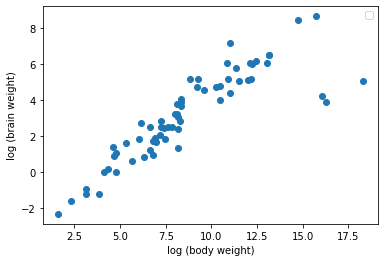

In [7]:
# Plot x_log/y_log
# Plot predictions
plt.scatter(x_log, y_log)
plt.xlabel("log (body weight)")
plt.ylabel("log (brain weight)")
plt.legend()
plt.show()

Exercise: Filter outliers and fit a linear regression
---

> **Exercise**: (A) Fit a linear regression to `x_log` and `y_log`. (B) Filter the three outliers. (C) Fit another linear regression. (D) Visually compare the two models by plotting their prediction lines.

x1/y1: (62,) (62,)


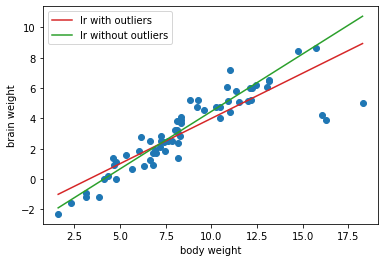

In [9]:
# (A) Fit a linear regression using all the data points
coefs_all = np.polyfit(x_log, y_log, deg=1)

# (B) Filter the three outliers
# Points in the upper left or lower right corners
idx = ((x_log > 15) & (y_log < 6))

# The resulting "normal" points
x1_log, y1_log = x_log[~idx], y_log[~idx]
print("x1/y1:", x1_log.shape, y1_log.shape)

# (C) Fit a linear regression using the rest of the data points
coefs_wo = np.polyfit(x1_log, y1_log, deg=1)

# (D) Plot the two models
# Compute prediction line
x_values = np.linspace(min(x_log), max(x_log), num=100)
y_values = np.polyval(coefs_all, x_values)
y_values_wo = np.polyval(coefs_wo, x_values)

# Plot them
plt.scatter(x_log, y_log)
plt.plot(x_values, y_values, c="C3", label="lr with outliers")
plt.plot(x_values, y_values_wo, c="C2", label="lr without outliers")
plt.xlabel("body weight")
plt.ylabel("brain weight")
plt.legend()
plt.show()

Exercise: Fit a linear regression using Huber loss
---

> **Exercise**: Fit a linear regression to `x_log` and `y_log` using Huber loss. Plot the prediction line.

**Self-assessment**: You should get a result close to the linear regression without outliers.

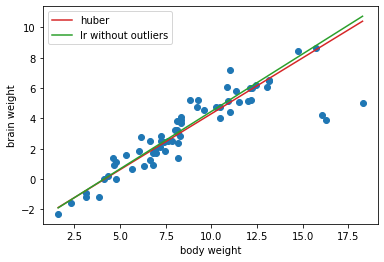

In [17]:
from sklearn.linear_model import HuberRegressor
# Create a linear regression with Huber loss
lr_huber = HuberRegressor(epsilon=1.1)

# Fit the model
lr_huber.fit(x_log[:, np.newaxis], y_log)

# Fit a linear regression using Huber loss
X_poly = np.c_[x_log]  # Feature engineering
lr_huber.fit(X_poly, y_log)


# Compute prediction line
x_values = np.linspace(min(x_log), max(x_log), num=100)
y_values_huber = lr_huber.predict(np.c_[x_values])

# Plot it
plt.scatter(x_log, y_log)
# Plot the prediction line
plt.plot(x_values, y_values_huber, c="C3", label="huber")
plt.plot(x_values, y_values_wo, c="C2", label="lr without outliers")
plt.xlabel("body weight")
plt.ylabel("brain weight")
plt.legend()
plt.show()

Exercise: Comptue the *Encephalization Quotient (EQ)*
---

We saw that the equation of a simple linear regression for variables on a logarithmic scale: $\log\left(y\right)=a\log\left(x\right)+b$ is equivalent to $y=cx^{a}$ where $c=e^{b}$. In our example, we can use this equation to calculate the **Encephalization Quotient (EQ)**.

The idea is to compute estimations of brain weights for each data point using $\hat{y}=cx^{a}$ and compare them to the actual brain weights. The EQ coefficient is defined as

$$
\text{EQ}=\frac{y}{\hat{y}}
$$

> **Exercise**: (A) Create the `a` and `c` values using the coefficients of the linear regression model without outliers. (B) Compute the estimated brain weights $\hat{y}$. (C) Compute the EQ values and add them to the `data_df` DataFrame. (D) Print the five rows with the largest quotients.

**Self-assessment**: You should see humans and monkeys in the first places - humans with an EQ around 7.

In [18]:
# (A) Create a and c values
a, b = coefs_wo
c = np.exp(b)
print("brain = {:.3f}*body^{:.3f}".format(c, a))

# (B) Compute predicted brain weights
y_pred = c * x ** (a)

# (C) Compute EQ
data_df["EQ"] = y / y_pred

# (D) Print the five largest quotients
data_df.sort_values(by="EQ", ascending=False).head()

brain = 0.044*body^0.758


,body,brain,label,EQ
48,62000.0,1320.0,Human,6.960230
57,6800.0,179.0,Rhesus monkey,5.044836
26,10550.0,179.5,Baboon,3.625807
22,480.0,15.5,Owl monkey,3.261447
21,101.0,4.0,Ground squirrel,2.744688
